[Table of Contents](table_of_contents.ipynb)

# Chapter 1.  The Unit Circle $S^1$: Kinematics, Control, and Estimation

1. [Definitions and Notation](#Definitions-and-Notation)
1. [Kinematics](#Kinematics)
  - [Exponential and Logarithmic Maps](#Exponential-and-Logarithmic-Maps)
1. [Optimization](#Optimization)
1. [Differential Equation Solvers](#Differential-Equation-Solvers)
1. [Control](#Control)
1. [Estimation](#Estimation)

## Definitions and Notation

We begin the study of Lie Groups and Lie Algebras by studying differential equations defined on the unit circle in $\mathbb{R}^2$.  Note that the unit circle in $\mathbb{R}^2$ is a one dimensional manifold embedded in the two dimensional Euclidean space $\mathbb{R}^2$. Two spaces are said to be isomorphic if there is a differentiable one-to-one mapping between elements in each space.  Note that $\mathbb{R}^2$ is isomorphic to the complex plane $\mathbb{C}$ by equating the $x$-axis with the real line and the $y$-axis with the imaginary line.  In $\mathbb{R}^2$ the unit circle is given by $S^1 = \{ (x_1, x_2)\in\mathbb{R}^2: x_1^2+x_2^2=1\}$.  In the complex plane, the unit circle is the set $S^1 = \{z\in\mathbb{C}: |z|=1\}$.  Since any complex number $z\in\mathbb{C}$ can be written in rectangular form as $z=a+jb$ and in polar form as $z=me^{j\theta}=m\cos\theta +jm\sin\theta$, the unit circle can be alternatively represented as $S^1 = \{e^{j\theta}\in\mathbb{C}: \theta\in(-\pi, pi]\}$.

Define the set of 2x2 matrices $\mathcal{M} = \left\{\begin{pmatrix} a & -b \\ b & a\end{pmatrix}: a,b \in \mathbb{R} \right\}\subset \mathbb{R}^{2\times 2}$.  It is clear that the complex plane $\mathbb{C}$ is isomorphic to $\mathcal{M}$ since for every complex number $z=a+jb$ there is unique element in $\mathcal{M}$, and visa versa.  It turns out that multiplying complex numbers is equivalent to matrix multiplication over $\mathcal{M}$. As can be seen from simple algebra:
\begin{align*}
(a+jb)(c+jd) &= (ac-bd) + j(bc+ad) \\
\begin{pmatrix} a & -b \\ b & a \end{pmatrix} \begin{pmatrix} c & -d \\ d & c \end{pmatrix} &= \begin{pmatrix} ac-bd & -(bc+ad) \\ (bc+ad) & ac-bd \end{pmatrix}
\end{align*}

In fact, define $I=\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}\subset\mathcal{M}$ and $J=\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}\subset\mathcal{M}$ and note that $I^2=I$, $IJ=JI=J$ and $J^2=-I$.  Therefore $I$ acts like the complex number $1$, and $J$ acts like the complex number $j=\sqrt{-1}$.  Any element of $\mathcal{M}$ can be written as $aI+bJ$ in the same way that any element of the complex plane $\mathbb{C}$ can be written as $a+jb$.


The unit circle embedded in the complex plane is given by the set $S^1=\{ z\in\mathbb{C}: |z|=1\}$.  Similarly, the unit circle embedded in the set of $2\times 2$ matrices $\mathbb{R}^{2\times 2}$ is given by $S^1=\{G\in\mathcal{M}: \det{G}=1\}$.  

For example, the point $x=(1/\sqrt{2}, 1/\sqrt{2})^\top$ represent a point on the unit circle in $\mathbb{R}^2$ that is equivalent to the representation $z=e^{j\frac{\pi}{4}}$ in $\mathbb{C}$, that is equivalent to the representation $G=\begin{pmatrix}\frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{pmatrix}$ in $\mathbb{R}^{2\times 2}$.

Therefore, we can talk of embeddings 
\begin{align*}
\pi_1: S^1 &\rightarrow \mathbb{R}^2, \\
\pi_2: S^1 &\rightarrow \mathbb{C}, \\
\pi_3: S^1 &\rightarrow \mathbb{R}^{2\times 2}.
\end{align*}


A matrix $R$ is said to be orthgonal if $R^\top R = RR^\top = I$.  The set of $2\times 2$ orthogonal matrices is denoted $O(2)$.  Orthogonal matries can have determinant equal to $\pm 1$.  The set of orthogonal matrices with determinant equal to 1 is denoted $SO(2)$ and is the called the special orthogonal group.  It is fairly straight forward to show that $SO(2)=\{G\in\mathcal{M}: det(G)=1\}$ and is therefore isomorphic to $S^1$.

The following code establishes a class for $S^1$.  We will use matrices in $\mathbb{R}^{2\times 2}$ as the native representation for elements of $S^1$ and provide functions that convert between the representations.  Since $S^1$ is isomorphic to $SO(2)$ and since we will generalize $SO(3)$ later, the discussion that follows will focus on $SO(2)$.

In [2]:
%matplotlib inline
import random

import numpy as np
import matplotlib.pyplot as plt

class lie_group_SO2:
    # this class will be used to define operations on SO2
    def __init__(self, G=np.eye(2)):
        self.mat = G
    
    # generate a random element in SO2
    def gen_random_element(self):
        th = random.uniform(-np.pi, np.pi)
        self.mat = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
    
    # functions that convert between representations
    def vector(self):
        return self.mat[:,0]

    def complex(self):
        return self.mat[0,0] + self.mat[1,0]*1j   
    
    def magPhase(self):
        mag = np.sqrt(self.mat[0,0]**2 + self.mat[1,0]**2)
        phase = np.arctan2(self.mat[1,0], self.mat[0,0])
        return mag, phase
    

The following code tests these functions.

In [40]:
G1 = lie_group_SO2()
G1.gen_random_element()
print('G=', G1.mat)
x = G1.vector()
print('x=', x)
z = G1.complex()
print('z=', z)
mag, phase = G1.magPhase()
print('mag = ', mag, ', phase = ', 2*np.pi*phase, 'deg')

G= [[ 0.55832249 -0.82962401]
 [ 0.82962401  0.55832249]]
x= [0.55832249 0.82962401]
z= (0.5583224867623947+0.8296240116917154j)
mag =  1.0 , phase =  6.147681643184119 deg


In mathematics, a group is defined as a set of objects $\mathcal{G}$ that contains a unique element $I\in\mathcal{G}$ called the identity, and an operation $\cdot$ such that 
*  $G_1, G_2 \in \mathcal{G}$ implies that $G_1\cdot G_2 \in \mathcal{G}$,
*  For every $G\in\mathcal{G}$ there exists and element $H\in\mathcal{G}$ such that $G\cdot H = H\cdot G = I$.  $H$ is called the inverse of $G$ and will be denoted as $G^{-1}$.

The first item implies that $\mathcal{G}$ is closed under the $\cdot$ operation.  The second item implies that every element in $\mathcal{G}$ has an inverse.

For $S^1$, the $\cdot$ operator is defined differently depending on the space into which it is embedded.  For example, in $\mathbb{C}$, let $z_1=e^{j\theta_1}$ and $z_2=e^{j\theta^2}$, then clearly 
\begin{equation}
z = z_1 z_2 = e^{j\theta_1} e^{j\theta_2} = e^{j(\theta_1+\theta)}
\end{equation}
is an element of $S^1$, and if $z=1+j0$ is the identity, then the inverse operator is simply the complex conjugate since
\begin{equation}
z\bar{z} = e^{j\theta} e^{-j\theta} = e^{j(\theta-\theta)} = e^{j0} = 1.
\end{equation}

On the other hand, if $S^1$ is embedded in $\mathbb{R}^{2\times 2}$, and the identity is defined as the identity matrix, then the $\cdot$ operator is simply matrix multiplication since
\begin{align*}
G_1 G_2 &= \begin{pmatrix} \cos(\theta_1) & -\sin(\theta_1) \\ \sin(\theta_1) & \cos(\theta_1) \end{pmatrix}
\begin{pmatrix} \cos(\theta_2) & -\sin(\theta_2) \\ \sin(\theta_2) & \cos(\theta_2) \end{pmatrix} \\
&= \begin{pmatrix} \cos(\theta_1)\cos(\theta_1)-\sin(\theta_1)\sin(\theta_2) & -\cos(\theta_1)\sin(\theta_2)-\sin(\theta_1)\cos(\theta_2) \\ \cos(\theta_1)\sin(\theta_2)+\sin(\theta_1)\cos(\theta_2) & \cos(\theta_1)\cos(\theta_1)-\sin(\theta_1)\sin(\theta_2) \end{pmatrix} \\
&= \begin{pmatrix} \cos(\theta_1+\theta_2) & -\sin(\theta_1+\theta_2) \\ \sin(\theta_1+\theta_2) & \cos(\theta_1+\theta_2) \end{pmatrix}
\end{align*}
and the inverse of $G\in\mathcal{G}$ is given by the matrix inverse since $GG^{-1}=I$.  

It should be clear that if $S^1$ is embedded in $\mathbb{R}^2$ the $\cdot$ and inverse operators are much more complex.  Since operations on the group $S^1$ can be carried out with matrix operations, the most convenient representation will be in $\mathbb{R}^{2\times 2}$.   (Actually, $\mathbb{C}$ is convenient for $S^1$ but does not extend to other groups, whereas matrix operations will extend to other groups useful in robotics.)

We can expand the python class to include an identity, the dot and the inverse operator.

In [42]:
class lie_group_SO2(lie_group_SO2):
    
    # compose (multiply) two elements in SO2
    def dot(self, G1):
        return np.dot(self.mat, G1)
    
    # return the identity element
    def identity():
        return np.eye(2)

    # return the inverse of an element in SO(2)
    def inverse(self):
        return self.mat.T

The following lines test the code.

In [43]:
G = lie_group_SO2()
G.gen_random_element()
print('G=', G.mat)
print('G^{-1}=', G.inverse())
G1 = lie_group_SO2()
G1.gen_random_element()
print('G*G1=', G.dot(G1.mat))

G= [[ 0.9967954   0.07999331]
 [-0.07999331  0.9967954 ]]
G^{-1}= [[ 0.9967954  -0.07999331]
 [ 0.07999331  0.9967954 ]]
G*G1= [[-0.93025175  0.36692191]
 [-0.36692191 -0.93025175]]


## Kinematics

From the above discussion, it is clear that $G\in SO(2)$ implies that $G=\begin{pmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}$.  Suppose now that $\theta\equiv\theta(t)$ is a function of time, then
\begin{equation*}
G(t) = \begin{pmatrix} \cos\theta(t) & -\sin\theta(t) \\ \sin\theta(t) & \cos\theta(t)\end{pmatrix}.
\end{equation*}

Taking the derivative with respect to time we get
\begin{align}
\dot{G} &= \begin{pmatrix} -\dot{\theta}\sin\theta & -\dot{\theta}\cos\theta \\ \dot{\theta}\cos\theta & -\dot{\theta}\sin\theta \end{pmatrix} \\
&= \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} 
   \begin{pmatrix} 0 & -\dot{\theta} \\ \dot{\theta} & 0 \end{pmatrix} \\
&= G\dot{\theta}^\times,
\end{align}
where we define
\begin{equation*}
\dot{\theta}^\times = \begin{pmatrix} 0 & -\dot{\theta} \\ \dot{\theta} & 0 \end{pmatrix}.
\end{equation*}

The kinematic equation of motion on $SO(2)$ is therefore given by $\dot{G} = G\dot{\theta}^\times$

Note that in $\mathbb{R}^2$, the tangent to the unit circle at the point $(1,0)$ is a vertical line given by $\ell = \{\sigma\begin{pmatrix} 0 \\ 1\end{pmatrix}: \sigma\in\mathbb{R}\}$.

(-3, 3, -3, 3)

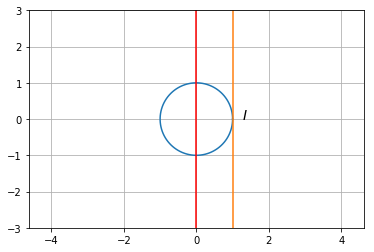

In [72]:
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))
S = 3
tangent_plane = np.column_stack((np.ones(100), np.linspace(-S, S, 100))) 
plt.plot(tangent_plane[:,0], tangent_plane[:,1])
lie_alg = np.column_stack((0.*np.ones(100), np.linspace(-S, S, 100))) 
plt.plot(lie_alg[:,0], lie_alg[:,1], color='red')
plt.text(1.25, 0, '$I$', fontsize=14)
plt.axis('equal')
plt.grid(True)
plt.axis((-S, S, -S, S))

The tangent plane is shown in orange and the Lie algebra, which is a subspace of $\mathbb{R}^2$ is shown in red.  When $G$ is not the identity, then the tangent plane and its tangent space is shown in the plot below.  Note that the tangent space is a rotated (transformed) version of the Lie algebra.

(-3, 3, -3, 3)

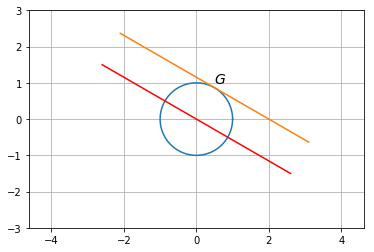

In [76]:
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))
S = 3
th = 60*np.pi/180.
G = np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])
tangent_plane = np.column_stack((np.ones(100), np.linspace(-S, S, 100))) 
tangent_plane = np.dot(G, tangent_plane.T).T
plt.plot(tangent_plane[:,0], tangent_plane[:,1])
lie_alg = np.column_stack((0.*np.ones(100), np.linspace(-S, S, 100))) 
tangent_space = np.dot(G, lie_alg.T).T
plt.plot(tangent_space[:,0], tangent_space[:,1], color='red')
plt.text(0.5, 1.0, '$G$', fontsize=14)
plt.axis('equal')
plt.grid(True)
plt.axis((-S, S, -S, S))

In the complex plane $\mathbb{C}$, the tangent to $S^1$ at the identity $z=1+0j$ is the vertical line $\ell = \{ \sigma j: \sigma\in\mathbb{R}\}$.  In the set of $2\times 2$ matrices, the tangent to $S^1=SO(2)$ at the identity $G=I$ is the vertical line $\ell = \{\sigma\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}: \sigma\in\mathbb{R}\} = \{\sigma J: \sigma\in\mathbb{R}\}$.  


The tangent space at the identity $G=I$ is called the Lie Algebra.  

The Lie algebra of $SO(2)$ will be denoted ${\mathfrak so}(2)$ and in $\mathbb{R}^{2\times 2}$ is given by
\begin{equation}
{\mathfrak so}(2) = \{ \sigma J: \sigma\in\mathbb{R}\}
\end{equation}

In $\mathbb{R}^{2\times 2}$, the Lie bracket is the standard matrix Lie bracket defined as $[A,B]=AB-BA$, where $A,B\in so(2)$.  Note that since $A,B\in so(2)$ that we can write $A=aJ$ and $B=bJ$ and therefore
\begin{align*}
[A,B] &= AB - BA \\
      &= (aJ)(bJ)-(bJ)(aJ) \\
      &= (-abI) - (-baI)\\
      &= 0.
\end{align*}
Therefore, the Lie bracket on $so(2)$ is always zeros.  Lie groups whose Lie bracket is always zero are called Abelian Lie groups.

Note that the tangent space at an element that is not equal to identity, is just a transformed version of the Lie algebra ${\mathfrak so}(2)$.  Since $\dot{G}=G\omega^{\times}$, the tangent space at G is $G\omega^{\times}=GJ\omega$.  

### Exponential and Logarithmic Maps
We have shown that the kinematic equation of motion on $SO(2)$ can be written as 
\begin{equation}
\dot{G} = G\omega^\times.
\end{equation}
Rearranging we get $\dot{G}-G\omega^\times=0$.  Multiplying both sides of the equation by the integrating factor $e^{-\omega^\times}$ gives
\begin{equation}
(\dot{G} - G\omega^\times)e^{-\omega^\times} = 0,
\end{equation}
which implies that 
\begin{equation}
\frac{d}{dt}Ge^{-\omega^\times} = 0.
\end{equation}
Integrating both sides from $0$ to $t$ gives
\begin{equation}
G(t) = G(0)e^{\omega^\times t}.
\end{equation}
Since $\omega^\times t = J(\omega t)$, the exponential function maps the Lie algebra ${\mathfrak so}(2)$ to the Lie group $SO(2)$.  

For $SO(2)$ there is a simple formula for the exponential map $e^{J\sigma}$ since $J^2=-I$ we have
\begin{align*}
e^{J\sigma} &= I + J\sigma + \frac{1}{2!}J^2\sigma^2 + \frac{1}{3!}J^3\sigma^3 + \frac{1}{4!}J^4\sigma^4 + \cdots \\
&=(1-\frac{1}{2!}\sigma^2 + \frac{1}{4!}\sigma^4 + \cdots)I + (\sigma - \frac{1}{3!}\sigma^3 + \frac{1}{5!}\sigma^5+\cdots)J \\
&=\cos\sigma I + \sin\sigma J \\
&=\begin{pmatrix}\cos\sigma & -\sin\sigma \\ \sin\sigma & \cos\sigma \end{pmatrix}.
\end{align*}
Therefore the map $exp: {\mathfrak so}(2)\rightarrow SO(2)$ is periodic and is not one-to-one.

On the other hand, the logarithm maps the Lie group to the Lie algebra as $\log:SO(2)\rightarrow {\mathfrak so}(2)$ and is defined as
\begin{equation}
\log\begin{pmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} = (\theta + 2\pi n)J.
\end{equation}
Alternatively, we could write
\begin{equation}
\log(G) = (\vartheta + 2\pi n)J, \quad \text{where} \quad \vartheta = \tan^{-1}\left(\frac{G_{21}}{G_{11}}\right).
\end{equation}
We can add Python methods implement the logarithmic and exponential maps.



In [62]:
class lie_group_SO2(lie_group_SO2):
    
    # Exponential of g in so(2)
    def exp(self, g):
        # check to see of g is in so(2)
        if np.linalg.norm(g+g.T)<.000001:
            th = g[1,0]
            G = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
            return G
        else:
            print('g is not in so(2)')
    
    # log of G in SO(2)
    def log(self):
        # check to see if G is in SO(2)
        if np.linalg.norm(np.dot(self.mat, self.mat.T)-np.eye(2))<.000001:
            varphi = np.arctan2(self.mat[1,0],self.mat[0,0])
            g = np.array([[0, -varphi], [varphi, 0]])
            return g
        else:
            print('G is not in SO(2)')


In [67]:
# generate a random element in SO(2)
G = lie_group_SO2()
G.gen_random_element()
print('G=', G.mat)
# map to so(2) through the log
g = G.log()
print('g=', g)
# map back to SO(2) through the exp
H = G.exp(g)
print('H=', H)



G= [[ 0.55785832  0.8299362 ]
 [-0.8299362   0.55785832]]
g= [[ 0.         0.9789933]
 [-0.9789933  0.       ]]
H= [[ 0.55785832  0.8299362 ]
 [-0.8299362   0.55785832]]


## Optimization (Gradient Descent) on $S^1$

This section follows http://www.seas.upenn.edu/~cjtaylor/PUBLICATIONS/pdfs/TaylorTR94b.pdf

Consider the robot odometry problem where the objective is to find the correct rotation and translation between two frames given $N$ matching features.  For the $i^{th}$ feature, let $\bar{p}_i\in\mathbb{R}^2$ be the position of the feature in Camera-0, and let $\bar{q}_i\in\mathbb{R}^2$ be the position in Camera-1.  If $R$ is the rotation from Camera-0 to Camera-1 and if $T$ is the position of Camera-0 relative to Camera-1 in the Camera-1 coordinates, then
\begin{equation}
\bar{q}_i = R\bar{p}_i + T.
\end{equation}
Let $\bar{q}_i = \lambda_i q_i$ and $\bar{p}_i = \mu_i p_i$, where $q_i$ and $p_i$ are in image normalized coordinates, where the second element is one.  



<<<<<<< LOCAL CELL DELETED >>>>>>>
## Optimization

Gradient Descent on $S^1$

Jerel

## Differential Equation Solvers
In any implementation of time-varying systems, thought must be given to numerical integration methods for finding approximate solutions to differential equations. Typical algorithms include Euler's Method and Runge-Kutta Methods (i.e., RK4). However, these classical algorithms are developed for use on flat Euclidean spaces and numerical instability issues can arise when applied to curvy manifolds such as the Lie groups relevant to robotics. For these applications, numerical Lie group integrators can be used to improve stability&mdash;especially over long time windows and for slower sampling rates.

### Motivating Example
Consider the following motivating example. A pencil is spinning on a flat table. It's configuration space is $S^1$, which represents the space of possible $1$-dimensional orientations. The pencil's angular velocity is given by $\dot{\theta} = \omega(t)$, which we can measure using a nanometer-sized gyro with a sampling rate of $T_s=0.01$ seconds. Our objective is to use these angular velocity measurements to perform dead-reckoning so we can estimate the current angle of the pencil.

Let's first generate samples from the gyro on our spinning pencil. We assume that the pencil starts with some initial velocity that slowly decays over time.

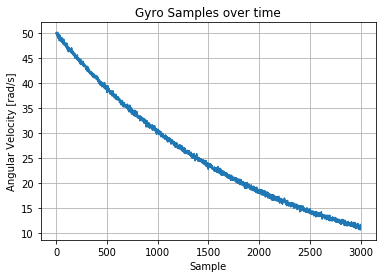

In [3]:
def generate_gyro_samples(w0=50, Ts=0.01, secs=5, **kwargs):
    # number of samples
    N = int(secs/Ts)
    
    # sample time vector
    n = np.arange(N)

    # generate the slowly-decaying signal
    alpha = kwargs['alpha']
    w = w0*np.exp(-alpha*(n*Ts))
    
    # Make some noise!
    sigma = kwargs['sigma']
    eta = sigma*np.random.randn(N)
    
    return w + eta

# Simulation parameters
P = {
    # initial angular velocity
    'w0': 50,
    
    # sample period
    'Ts': 0.01,
    
    # duration of simulation
    'secs': 30,
    
    # exponential decay parameter
    'alpha': 0.05,
    
    # std dev of AWGN
    'sigma': 0.25
}

# Generate samples of gyro measurements
w = generate_gyro_samples(**P)
fig = plt.figure()
plt.plot(w)
plt.title('Gyro Samples over time')
plt.grid(); plt.xlabel('Sample'); plt.ylabel('Angular Velocity [rad/s]')
plt.show()

#### Group Representation Class
To represent the orientation, which is an element of $S^1$, the following Python class is used. Internally, we use the unit-length complex number representation of group elements.

In [4]:
class S1:
    def __init__(self, theta=0):
        # The representation of the group element
        self.z = self.from_algebra(theta)
        
        # Also store the original element of the algebra
        self.theta = theta
    
    def from_algebra(self, theta):
        return np.exp(1j*theta)
    
    def to_algebra(self, z):
        return np.imag(np.log(z))
    
    def visualize(self, trajectory=np.array([])):
        """Visualize the group element on its manifold
        :param trajectory: optional list of group elements to plot
        """
        fig = plt.figure(figsize=(7,7))

        n = np.linspace(0, 2*np.pi, 100)
        plt.plot(np.cos(n), np.sin(n))
        plt.axis('square'), plt.axis([-2, 2, -2, 2]), plt.axis('off')
        
        if not trajectory.size:
            trajectory = np.array([self.z])

        x, y = np.real(trajectory), np.imag(trajectory)
        plt.scatter(x, y, s=50, c='r')
        
        plt.show()

Using this class, we can visualize the current orientation of the pencil on the manifold $S^1$.

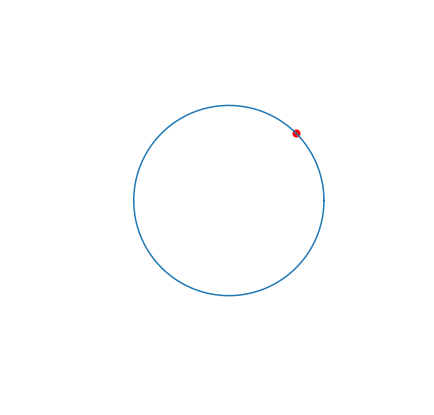

In [5]:
z = S1(theta=np.pi/4)
z.visualize()

#### Kinematics
The kinematics that describe the evolution of the pencil's orientation on the manifold is given by the first-order differential equation

\begin{equation}
\dot{z} = f(z) = j \dot{\theta} z = j \omega z,
\end{equation}

where $\theta \in \mathfrak{g} = \mathbb{R}$ and $z \in \mathcal{G} = S^1$.

#### Euler's Method (Naive)
We would like to use a computer to approximate this ODE. A common numerical method for solving first-order ODEs is Euler's Method, an explicit algorithm which uses the limit definition of a derivative to find the update rule

\begin{align}
\frac{z(t+h)-z(t)}{h} &= j\omega z(t)\\
z(t+T_s) &= z(t)+h\omega j z(t).
\end{align}

Assuming $\omega$ is constant in each sample interval and using $h=T_s$ (since that's when we have data to integrate), discretizing yields the digital algorithm

\begin{align}
z[n+1] &= z[n]+jT_s\omega[n] z[n]
\end{align}

In [6]:
class S1(S1):
    def euler_integration(self, w, Ts=0.01, secs=5, **kwargs):
        # convert seconds to steps
        steps = int(secs/Ts)
        
        # Store trajectory
        trajectory = np.zeros((steps+1,), dtype=complex)
        trajectory[0] = self.z

        for i in range(steps):
            self.z += Ts*( 1j*w[i]*self.z )
            trajectory[i+1] = self.z
            
        return trajectory

|z_final| = 3550019054817597167461004614102347968222888722432.0000


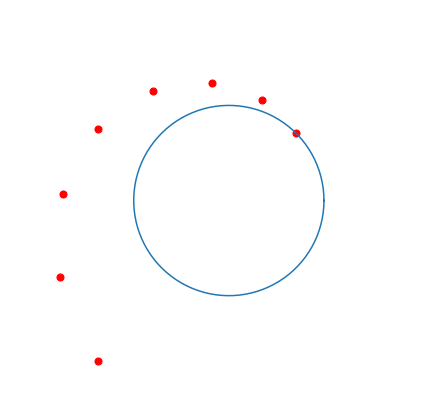

In [7]:
z = S1(theta=np.pi/4)
traj = z.euler_integration(w, **P)
print("|z_final| = {:.4f}".format(np.abs(traj[-1])))
z.visualize(traj)

The issue with this approach is that Euler's Method as it was implemented is only for Euclidean spaces. Note that the update steps calls for the addition of two group elements, which is not defined in $S^1$ and this scheme will cause the updated group element to lose the group property that $|z|=1$ and thus it will leave the manifold.

This is the core motivation for a study of Lie groups. Without the Lie group machinery, our estimation and control algorithms would suffer from numerical instability or costly normalization steps to reproject the updated value onto the manifold.

#### Runge-Kutta 4 (RK4)
Of course, Euler's Method is a first-order, rough approximation of any differential equation -- even in Euclidean space. We can build a much stronger argument for the need of Lie group integrators by investigating the results of integrating the differential equation using the Euclidean RK4 method. The RK4 method is given by

\begin{align}
y_{n+1}	&=	y_{n}+\frac{h}{6}\left(k_{1}+2k_{2}+2k_{3}+k4\right) \\
t_{n+1}	&=	t_{n}+h
 \end{align}
 
where
 
\begin{align}
k_{1} &= f\left(t_{n},y_{n}\right) \\
k_{2} &= f\left(t_{n}+\frac{h}{2},y_{n}+\frac{h}{2}k_{1}\right) \\
k_{3} &= f\left(t_{n}+\frac{h}{2},y_{n}+\frac{h}{2}k_{2}\right) \\
k_{4} &= f\left(t_{n}+h,y_{n}+hk_{3}\right)
\end{align}

In [8]:
class S1(S1):
    def rk4_integration(self, w, Ts=0.01, secs=5, **kwargs):
        # convert seconds to steps
        steps = int(secs/Ts)
        
        # Store trajectory
        trajectory = np.zeros((steps+1,), dtype=complex)
        trajectory[0] = self.z
        
        f = lambda i, t, z: 1j*w[i]*z

        for i in range(steps):
            t = i*Ts
            k1 = f(i, t, self.z)
            k2 = f(i, t + Ts/2, self.z + Ts/2*k1)
            k3 = f(i, t + Ts/2, self.z + Ts/2*k2)
            k4 = f(i, t + Ts  , self.z + Ts  *k3)
            self.z += (Ts/6)*(k1 + 2*k2 + 2*k3 + k4)
            trajectory[i+1] = self.z

        return trajectory

|z_final| = 0.9652


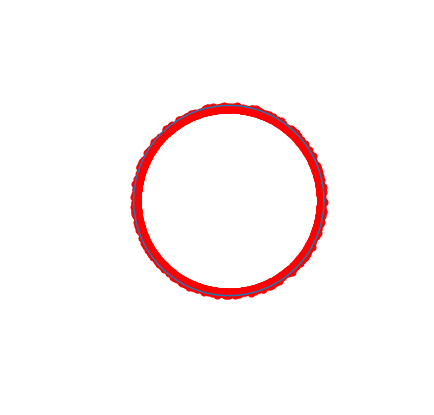

In [9]:
z = S1(theta=np.pi/4)
traj = z.rk4_integration(w, **P)
print("|z_final| = {:.4f}".format(np.abs(traj[-2])))
z.visualize(traj)

RK4 numerical integration does much better! But again, we can see that it breaks the constraint that $|z|=1$ and the updated elements eventually start leaving the manifold.

#### Simple Lie Integrator
Instead of using classic numerical techniques to approximate the solution to the $S^1$ kinematic equation, instead we can analytically solve the ODE and then discretize to obtain a digital implementation. This makes us feel better since it is rooted in mathematical theory.

Noting that the kinematics

\begin{equation}
\dot{z} = f(z) = j \omega z,
\end{equation}

is of the form

\begin{equation}
\frac{dz}{dt} + p(t)z(t) = q(t)
\end{equation}

with $p(t)=-j \omega$ and $q(t) = 0$, we can use the integrating factor  $exp(-\int_{t_{0}}^{t}j\theta\left(\tau\right)d\tau)$ to find a solution that satisfies this differential equation.

Making no assumptions about the content of the continuous signal $\omega(t)$, and using the integrating factor, we can write the kinematics as

\begin{equation}
\left(\dot{z}-j\omega(t)z\right)e^{-\int_{t_{0}}^{t}j\omega\left(\tau\right)d\tau} = 0.
\end{equation}

Using the product rule, this becomes

\begin{equation}
\frac{d}{dt}\left[ze^{-\int_{t_{0}}^{t}j\omega\left(\tau\right)d\tau}\right]=0.
\end{equation}

Taking the integral of both sides with respect to time gives

\begin{equation}
\int_{t_{0}}^{t}\frac{d}{d\tau}\left[ze^{-\int_{t_{0}}^{\tau}j\omega\left(\sigma\right)d\sigma}\right]d\tau=0,
\end{equation}

for which we can use the Fundamental Theorem of Calculus to find the solution

\begin{align}
z(t)e^{-\int_{t_{0}}^{t}j\omega\left(\tau\right)d\tau}-z(t_{0})e^{-\int_{t_{0}}^{t_{0}}j\omega\left(\tau\right)d\tau}	&=	0 \\
z(t)	&=	z(t_{0})e^{\int_{t_{0}}^{t}j\omega(\tau)d\tau}.
\end{align}

##### Digital Implementation: Zero-Order Hold
Because the gyro gives discrete samples every $T_s$ seconds, we need to discretize the solution for digital implementation. Let $t=nT_s$, $t_0=(n-1)T_s$ and use the notation $z[n]=z(nT_s)$. By using the concept of ZOH sampling, we assume that the signal is constant during the sample interval with $\omega[n]$. Therefore, $\int_{t_{0}}^{t}j\omega\left(\tau\right)d\tau=j\omega[n]T_{s}$ and

\begin{equation}
z[n]=z[n-1]e^{j\omega[n]T_{s}}
\end{equation}

In [10]:
class S1(S1):
    def lie_integration_zoh(self, w, Ts, secs=0, **kwargs):
        # convert seconds to steps
        steps = int(secs/Ts)
        
        # Store trajectory
        trajectory = np.zeros((steps+1,), dtype=complex)
        trajectory[0] = self.z
        
        for i in range(steps):
            self.z = self.z*np.exp(1j*w[i]*Ts)
            trajectory[i+1] = self.z
            
        return trajectory

|z_final| = 1.0000


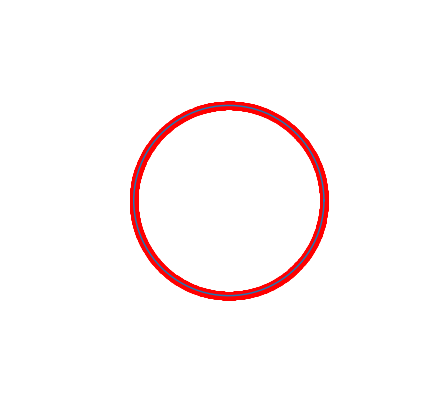

In [11]:
z = S1(theta=np.pi/4)
traj = z.lie_integration_zoh(w, **P)
print("|z_final| = {:.4f}".format(np.abs(traj[-1])))
z.visualize(traj)

Using the exponential mapping at each update, we see that the updated element stays on the manifold and maintains the geometric constraint $|z|=1$. Nice!

##### Digital Implementation: Delayed First-Order Hold
To increase our accuracy (especially for slower sampling rates), we assume that the signal is changing linearly between samples and apply a FOH. Note that for this scheme to implemented causally, it introduces a one sample lag.

## Control

Dan


## Estimation

Devon